<h1>IMPORTAMOS LIBRERÍAS

In [26]:
import random
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
from utils.function_module import read_data

<h1>DECLARACION DE DIRECTORIOS

In [27]:
ROOT = os.getcwd() + "\\faces-spring-2020"

TRAIN = ROOT + "\\dataset\\TRAIN\\"
TEST = ROOT + "\\dataset\\TEST\\"

<h1> ABRIR IMAGEN

(1024, 1024, 3)
255


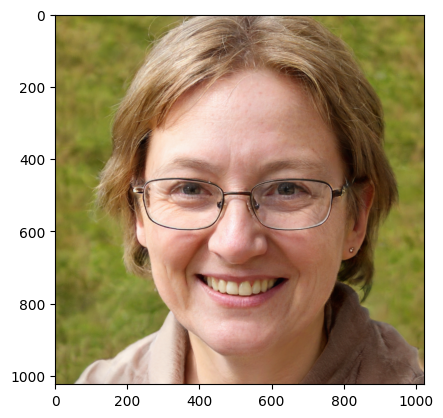

In [28]:
image = imread(TRAIN + "\\gafas (1268).png")

print(image.shape)
print(np.max(image))

plt.imshow(image)

<h1>PREPROCESAR IMÁGENES

<h2>1. Declaramos las constantes para el preprocesamiento de las imágenes:


In [29]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_CHANNELS=1
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 32
EPOCHS = 10

<h2>2. Preprocesamos la imagen:

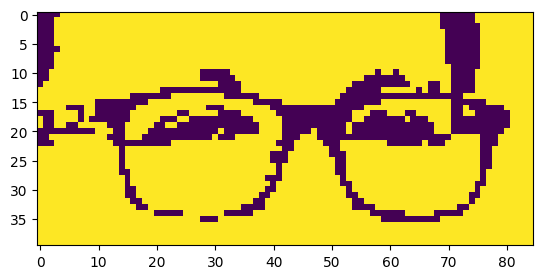

In [23]:
#Creamos una variable num con valores aleatorios para ver como afecta el preprocesos en las diferentes imágenes:
num = random.randint(1260,1300)

image = imread(f'{TRAIN}\\gafas ({num}).png')

image = cv2.resize(image, (128, 128))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image[40:80,20:105]

ret, thresh = cv2.threshold(image, 80, 255, cv2.THRESH_BINARY)

plt.imshow(thresh)

<h2>3. Guardamos las imágenes preprocesadas en un variable:

In [30]:
X_train, y_train = read_data(TRAIN, IMAGE_WIDTH)
X_test, y_test = read_data(TEST, IMAGE_WIDTH)

print(X_train.shape)
print(X_test.shape)

(2996, 40, 85)
(1338, 40, 85)


<h2>4. Estandarizamos los datos:

<h3><li>No estandarizados:</li>

In [31]:
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

print("Min:", np.min(X_test))
print("Max:", np.max(X_test))

Min: 0
Max: 255
Min: 0
Max: 255


<h3><li>Estandarizados:</li>

In [32]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0.0
Max: 1.0
Min: 0.0
Max: 1.0


[1 1 1 ... 0 0 0]
(40, 85)


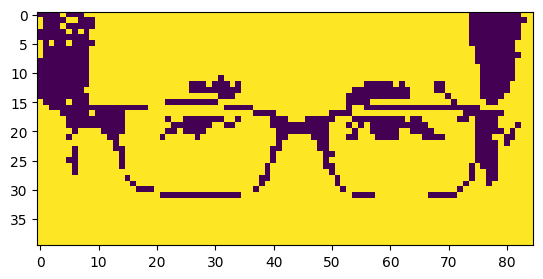

In [33]:
#Comprobamos que se han estandarizados bien:
print(y_train)

#Comprobamos el shape de una muestra:
print(X_train[0].shape)

#Comprobamos que la estandarización no ha alterado las imágenes:
plt.imshow(X_test[0])

<h1>MODELO

In [34]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [35]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

earlystop = EarlyStopping(patience=5)
mcheckpoint = ModelCheckpoint("callback_model.h5")

In [36]:
np.savez(ROOT + '/data.npz',
        X_train = X_train,
        y_train = y_train,
        X_test = X_test)

Epoch 1/10
19/19 [==============================] - 2s 47ms/step - loss: 0.5950 - accuracy: 0.6924 - val_loss: 0.4999 - val_accuracy: 0.7632
Epoch 2/10
19/19 [==============================] - 1s 33ms/step - loss: 0.3502 - accuracy: 0.8799 - val_loss: 0.3008 - val_accuracy: 0.8882
Epoch 3/10
19/19 [==============================] - 1s 34ms/step - loss: 0.1785 - accuracy: 0.9342 - val_loss: 0.1449 - val_accuracy: 0.9211
Epoch 4/10
19/19 [==============================] - 1s 38ms/step - loss: 0.1223 - accuracy: 0.9688 - val_loss: 0.1181 - val_accuracy: 0.9539
Epoch 5/10
19/19 [==============================] - 1s 32ms/step - loss: 0.0834 - accuracy: 0.9704 - val_loss: 0.1140 - val_accuracy: 0.9408
Epoch 6/10
19/19 [==============================] - 1s 34ms/step - loss: 0.0581 - accuracy: 0.9819 - val_loss: 0.0641 - val_accuracy: 0.9737
Epoch 7/10
19/19 [==============================] - 1s 37ms/step - loss: 0.0525 - accuracy: 0.9852 - val_loss: 0.0938 - val_accuracy: 0.9539
Epoch 8/10
19

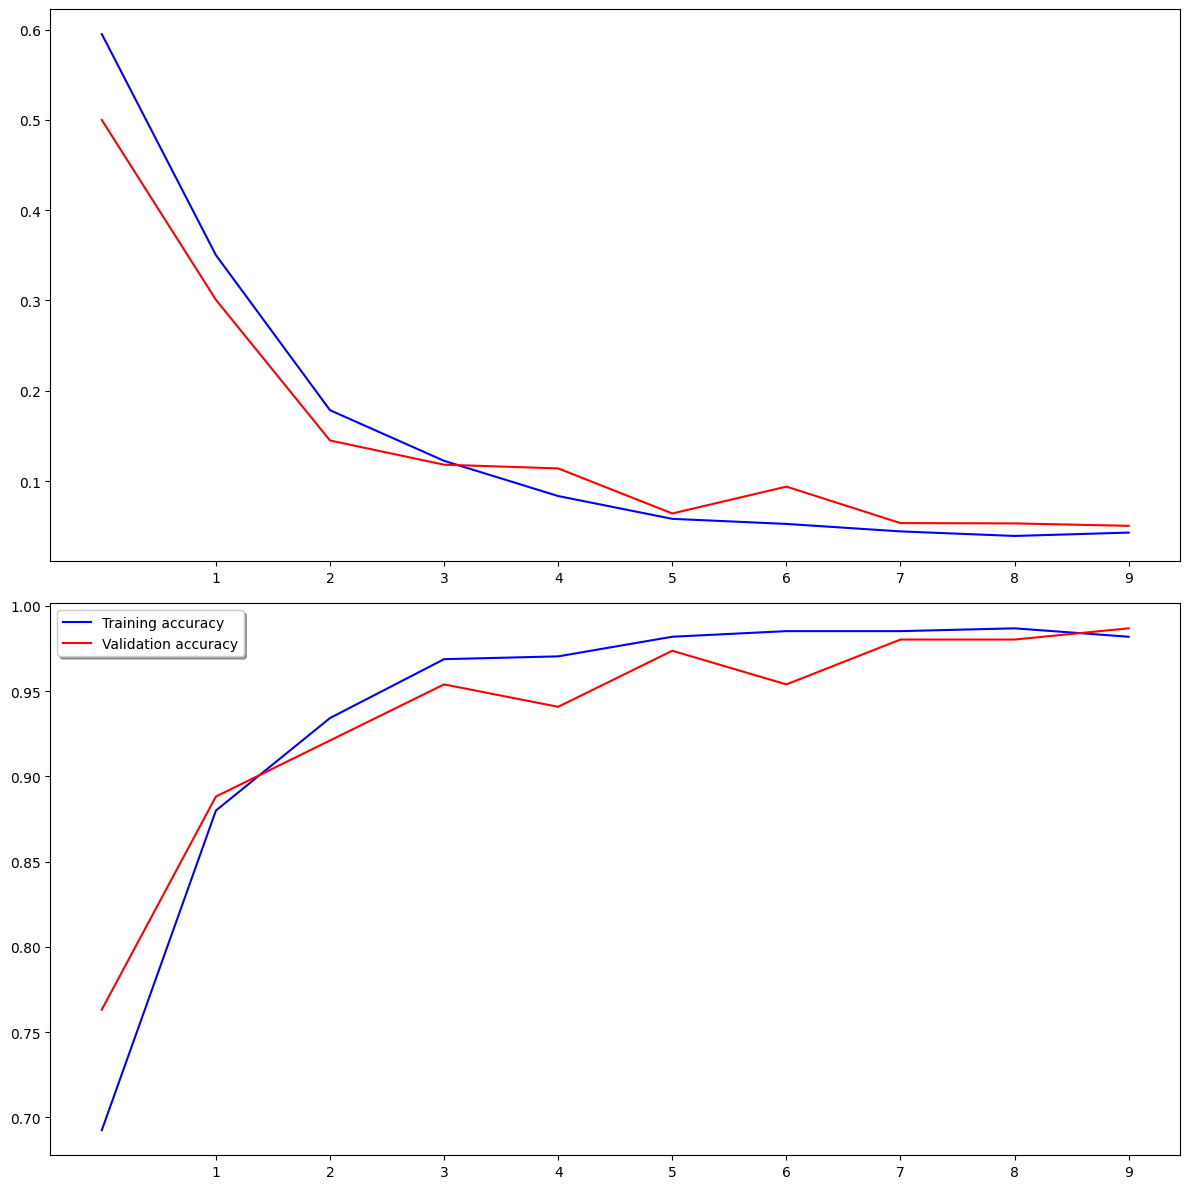

In [131]:
from tensorflow import keras

layers = [
    keras.layers.Conv2D(4, (3,3), activation='relu', input_shape=(40, 85, 1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='sigmoid')
]

model = keras.Sequential(layers)

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(X_train,
         y_train,
         epochs = 10,
         #steps_per_epoch = 20,
         batch_size = 32,
         callbacks = [earlystop, mcheckpoint],
         validation_split = 0.2,
         verbose=1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, EPOCHS, 1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, EPOCHS, 1))

plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

<h1>EXPORTAMOS MODELO

In [ ]:
model.save(".\\models\\modelo.h5")